# Import 

In [1]:
import os

# ignore les deprecated de tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator


D:\ana_conda\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ana_conda\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ana_conda\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ana_conda\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

## Telechargement du ZIP

In [3]:
from modules.loader import Loader

loader = Loader(
    "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz",
    '../datas/ZIP/',
    extraction_target='../datas/RAW/cifar-10',
    skip_unzip=False
)
loader.ensure_data_loaded()

Le fichier existe déjà
Successfully created the directory ../datas/RAW/cifar-10

Les fichiers sont correctement extractés


In [5]:
from extract_cifar import extract_cifar_10, get_meta_information

cifar_path = '..' + os.sep + 'datas' + os.sep + 'RAW' + os.sep + 'cifar-10'
cifar_path += os.sep + os.listdir('..' + os.sep + 'datas' + os.sep + 'RAW' + os.sep + 'cifar-10')[0]

curated_path = '..' + os.sep + 'datas' + os.sep + 'CURATED' + os.sep + 'taillequicompte'

if not os.path.exists(curated_path):
    label_list = extract_cifar_10(cifar_path, curated_path)
else:
    label_list, _, _ = get_meta_information(cifar_path + os.sep + 'batches.meta')
    print('les fichiers ont déjà été extractés')

## Splitting d'un jeu d'images

In [6]:
from modules.splitting_img import Splitting

TRAIN_DATA_DIR = Splitting.copie_dossiers(
    curated_path + os.sep + "train",
    label_list,
    4000,
    explorer=True
)

TEST_DATA_DIR = Splitting.copie_dossiers(
    curated_path + os.sep + "test",
    label_list,
    1000,
    explorer=True
)

Successfully created the directory d:\simplon\datas\CURATED\taillequicompte\train4000_airplane_automobile_bird_cat_deer_dog_frog_horse_ship_truck
Creation du dossier airplane
Creation du dossier automobile
Creation du dossier bird
Creation du dossier cat
Creation du dossier deer
Creation du dossier dog
Creation du dossier frog
Creation du dossier horse
Creation du dossier ship
Creation du dossier truck
Successfully created the directory d:\simplon\datas\CURATED\taillequicompte\test1000_airplane_automobile_bird_cat_deer_dog_frog_horse_ship_truck
Creation du dossier airplane
Creation du dossier automobile
Creation du dossier bird
Creation du dossier cat
Creation du dossier deer
Creation du dossier dog
Creation du dossier frog
Creation du dossier horse
Creation du dossier ship
Creation du dossier truck


## Chargement des images

In [7]:
# Taille d'image
TRAIN_IMAGE_SIZE = 32
# NB d'images envoyées à la fois
TRAIN_BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical')

augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.3, 1.25)
)
train_generator_augmented = augmented_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical')

Found 40000 images belonging to 10 classes.
Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


## Creation du modele

- convolution
- dense
- pooling

In [8]:
def create_model() -> Sequential:
    model = Sequential()

    model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

    #Toujours à la fin
    model.add(Flatten())
    model.add(Dense(len(label_list), activation='softmax'))

    model.summary()
    return model

result_dir = "result" + os.sep

In [9]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit(train_generator, epochs=20, validation_data=validation_generator, shuffle=False)

model_save = result_dir + 'model.h5'
model.save(model_save)
del model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                163850    
Total params: 187,434
Trainable params: 187,434
Non-trainable params: 0
__________________________________________________

In [10]:
augmented_model = create_model()
augmented_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

augmented_training = augmented_model.fit(train_generator_augmented, epochs=20, validation_data=validation_generator, shuffle=False)

model_save = result_dir + 'augmented_model.h5'
augmented_model.save(model_save)
del augmented_model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                163850    
Total params: 187,434
Trainable params: 187,434
Non-trainable params: 0
________________________________________________

## Plotting

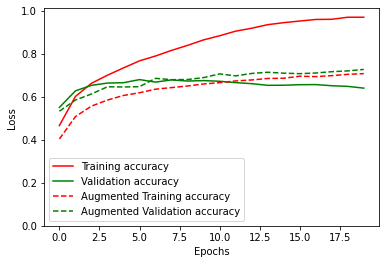

In [11]:
plt.plot(training.history['acc'], color='red', label='Training accuracy')
plt.plot(training.history['val_acc'],  color='green', label='Validation accuracy')
plt.plot(augmented_training.history['acc'], linestyle="dashed", color='red', label='Augmented Training accuracy')
plt.plot(augmented_training.history['val_acc'], linestyle="dashed", color='green', label='Augmented Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.ylim((0,1.01))

plt.show()

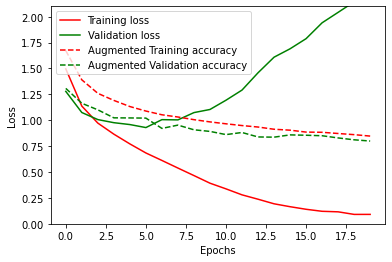

In [12]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')
plt.plot(augmented_training.history['loss'], linestyle="dashed", color='red', label='Augmented Training accuracy')
plt.plot(augmented_training.history['val_loss'], linestyle="dashed", color='green', label='Augmented Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.ylim((0, 2.1))

plt.show()